# Introduction

Music is an indispensible part in the many people's life. A good song, personally curated to one's sensibilites, is a gift for each person. It is also a big revenue-generating industry. The goal of this exploratory data analysis is to help streaming services such as Spotify understand their data better so they can make data-driven decisions and improve their recommendations system. The dataset provided contains information on songs, including attributes such as valence, acousticness, danceability, duration, and popularity.

Source of data: https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset

Additionally, Spotify provides developers, would-be and professional alike, with free access to their vast library of music analysis datasets at the website https://developer.spotify.com/ so anyone can try their hand at creating exciting recommendation system, enhanced personalization and help imroving the company's algorithm if possible. 

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

# Data Exploration

First, let's load data into a Pandas DataFrame

In [ ]:
songs_df = pd.read_csv('spotify_songs.csv')  # use for jupyter notebook

In [2]:
songs_df = pd.read_csv('/content/spotify_songs.csv')  # use for google colab

In [3]:
# preview first few rows of dataset
songs_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


From this, we can see that the dataset contains the following columns:
1. valence: This is a measure of the "positivity" of a song. It ranges from 0 to 1, with higher values indicating more positive or happy songs, and lower values indicating more negative or sad songs.
2. year: The year the song was released
3. acousticness: This measures how acoustic or "unplugged" a song sounds. It ranges from 0 to 1, with higher values indicating more acoustic or less electronic sounds, and lower values indicating more electronic or synthetic sounds.
4. danceability: This is a measure of how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall vibes.
5. duration: The duration of the song in minutes
6. explicit: Whether or not the song contains explicit lyrics
7. id: The unique identifier for the song
8. Instrumentalness:  This measures the amount of vocals in a song. It ranges from 0 to 1, with higher values indicating that a song is purely instrumental and does not contain any vocals, and lower values indicating that a song does contain vocals.
9. key: The key in which the song is written.
10. liveness: A measure of the presence of an audience in the recording.
11. loudness: The overall loudness of the song in decibles.
12. Mode - This indicates whether a song is in a major or minor key. It can be either 0 or 1, with 1 indicating a major key and 0 indicating a minor key.
13. name: The name of the song
14. popularity: The popularity of the song on a scale of 0-100
15. release_date: The date the song was released
16. speechiness: A measure of the presence of spoken words in the song
17. tempo: The overall estimated tempo of the song in beats per minute (BPM)

These features can be useful for music analysis and recommendation systems, as they can provide insights into the mood, genre, and style of a particular song. They are all included in Spotify's audio analysis dataset.

In [4]:
# take a closer look at metadata using describe function
songs_df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


From this, we can see that 
- the dataset contains a total of 170653 songs. 
- The mean popularity rating is 31.431794, with a standard deviation of 21.826615. 
- The mean duration of a song is 231.0 seconds, with a standard deviation of 126.0 seconds. 
- The mean loudness of a song is -11.467 decibels, with a standard deviation of 5.697 decibels.

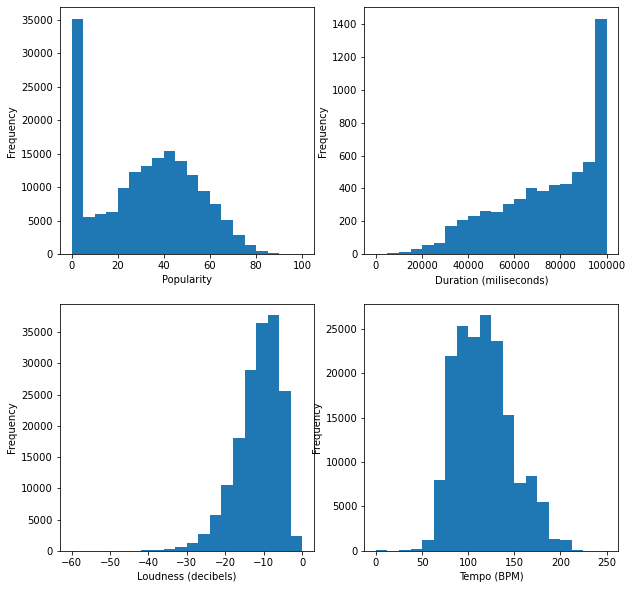

In [ ]:
# visualize distributions of some attributes using histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

songs_df['popularity'].plot(ax=axes[0, 0], kind='hist', bins=20, range=(0, 100))
songs_df['duration_ms'].plot(ax=axes[0, 1], kind='hist', bins=20, range=(0, 100000))
songs_df['loudness'].plot(ax=axes[1, 0], kind='hist', bins=20, range=(-60, 0))
songs_df['tempo'].plot(ax=axes[1, 1], kind='hist', bins=20, range=(0, 250))

axes[0, 0].set_xlabel('Popularity')
axes[0, 1].set_xlabel('Duration (miliseconds)')
axes[1, 0].set_xlabel('Loudness (decibels)')
axes[1, 1].set_xlabel('Tempo (BPM)')

plt.show()

From these histograms, we can see that:
- The popularity of songs is heavily skewed towards lower values, with a few songs having very high populraity ratings.
- The duration of songs is skewed towards longer duration, with a long tail of songs having short duration. This may be due to the fact a substantial amount of classical pieces are included.
- The loudness of songs is normally distributed, with most songs having a loudness between -15 and -5 decibels.
- The tempo of songs is also normally distributed, with most songs having a tempo between 100 and 150 BPM

# Data Preprocessing

Before we can answer business questions using this dataset, we need to clean it and prepare it. 

In [ ]:
# check if there are any missing values
songs_df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

From this, we can see there are no missing values in the dataset.

In [ ]:
# check for duplicates
songs_df.duplicated().sum()

0

From this, we can see that there are no duplicates.

In [ ]:
# drop any irrelevant columns
songs_df = songs_df.drop(['id', 'name'], axis=1)

In [ ]:
# convert 'release_date' to a datetime format:
songs_df['release_date'] = pd.to_datetime(songs_df['release_date'])

In [ ]:
# check data types of each column
songs_df.dtypes

valence                    float64
year                         int64
acousticness               float64
artists                     object
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
dtype: object

From this, we can see that all columns have correct data types.

# Data Analysis

Now we have preprocessed the data, we can answer some business questions:


# Business Question 1: What is the distribution of song popularity ratings?


Popularity is an important metric for Spotify as it can influence the placements of songs in playlists and recommendations. Let's visualize the distribution of song popularity ratings using a histogram:

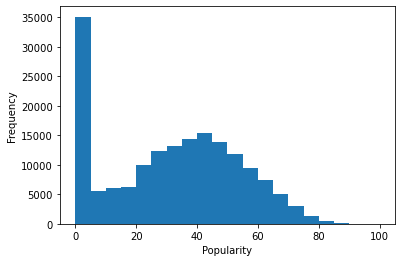

In [ ]:
songs_df['popularity'].plot(kind='hist', bins=20, range=(0, 100))
plt.xlabel('Popularity')
plt.show()

From this histogram, we can see that the majority of songs in the dataset have a popularity rating between 0 and 20, with a long tail of songs having higher popularity ratings. This means the majority of songs went unnoticed with only a few reaching widespread fame.

# Business Question 2: How has the average loudness of songs changed over time?

Loudness is an important attribute of songs as it can affect the listening experience. Let's group the dataset by year and calculate the average loudness of songs for each year:

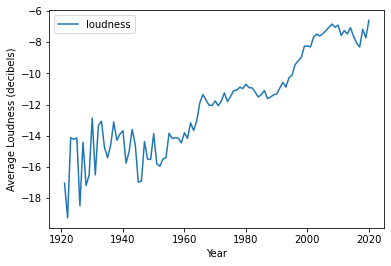

In [ ]:
loudness_by_year = songs_df.groupby('year')['loudness'].mean().reset_index()
loudness_by_year.plot(x='year', y='loudness')
plt.xlabel('Year')
plt.ylabel('Average Loudness (decibels)')
plt.show()

From this plot, we can see that the average loudness of songs has decreased over time, with a sharp decrease in the 1990s and early 2000s. It dips a little around 2018 but is increasing again. Music is getting louder and louder, inline with the increasing prominence of EDM and trap music.

# Business Question 3: How does the distribution of song tempos differ between major and minor modes?

Mode is an important attribute of songs as it can affect the mood and emotion conveyed by the song. Let's visualize the distribution of song tempos for major and minor modes using a box plot:

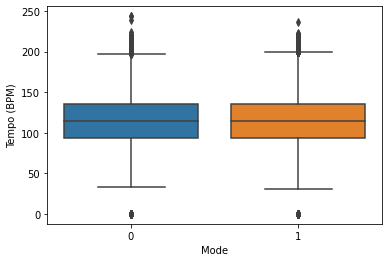

In [ ]:
sns.boxplot(x='mode', y='tempo', data=songs_df)
plt.xlabel('Mode')
plt.ylabel('Tempo (BPM)')
plt.show()

From this box plot, we can see that the distribution of song tempos is roughly the same for songs in major mode compared to songs in minor mode.

# Business Question 4: What is the most common key for songs?

Key is an important attribute of songs as it can affect the emotional impact of the song. Let's visualize the count of songs in each key using a bar chart:

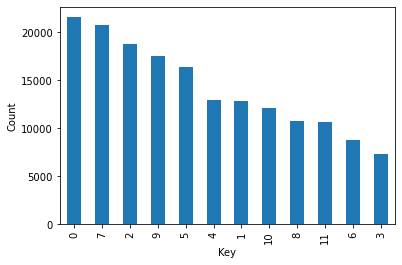

In [ ]:
key_counts = songs_df['key'].value_counts()
key_counts.plot(kind='bar')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

From this bar chart, we can see that the most common key for songs in the dataset is C major. It is one of the most popular keys in popular music.



Some examples of songs written in this key are:
- "Let it Be" by The Beatles
- "Happy" by Pharrell Williams
- "Hallelujah" by Leonard Cohen
- "Stay With Me" by Sam Smith
- "Counting Stars" by OneRepublic
- "Viva La Vida" by Coldplay
- "Don't Stop Believin'" by Journey
- "All of Me" by John Legend
- "Perfect" by Ed Sheeran
- "I Will Always Love You" by Whitney Houston

# Business Question 5: How does the distribution of acousticness differ between explicit and non-explicit songs?

Explicitness is an important attribute of songs as it can affect the target audience and the placement of the song. For example an explicit song must not be in a playlist that target general audience, but rather more mature audience. Let's visualize the distribution of acousticness for explicit and non-explicit songs using a density plot:

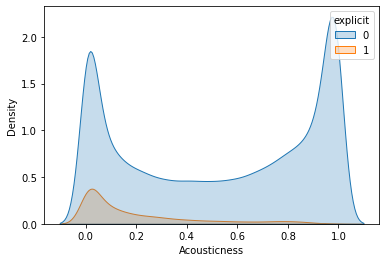

In [ ]:
sns.kdeplot(data=songs_df, x='acousticness', hue='explicit', fill=True)
plt.xlabel('Acousticness')
plt.ylabel('Density')
plt.show()

From this density plot, we can see that non-explicit songs tend to have a higher acousticness than explicit songs. 
This makes sense since most explicit songs are related to heavy beats and production, not soft-singing acoustic guitar.

# Business Question 6: What is the correlation between tempo and popularity?

Danceability is an important attribute of songs as it can affect the appeal and popularity of the song. Let's visualize the correlation between danceability and popularity using a scatter plot:

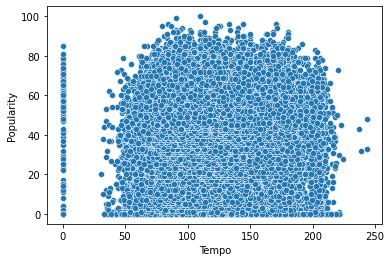

In [ ]:
sns.scatterplot(data=songs_df, x='tempo', y='popularity')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.show()

From this we can see popular songs cluster in mid tempo range, with some really slow songs having a dedicated audience. It should be noted that we can do this same analysis to obtain correlation between popularity with other attributes such as danceability, valence andd so on which will help us identify which kinds of songs are more popular.

# Business Question 7: Music from which time period is more popular?¶

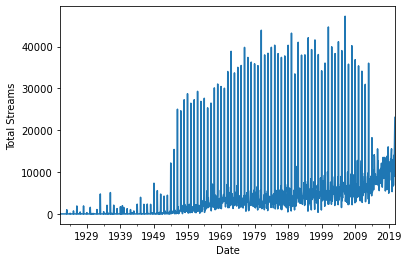

In [ ]:
monthly_counts = songs_df.resample('M', on='release_date')['popularity'].sum()
monthly_counts.plot()
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.show()

As expected, people listen to more recent, modern-day music. But interestingly, music from the 50s and 60s are not far behind present day music in terms of listeners.

We can visualize music popularity over time in a different way:
- Convert the 'release_date' column to a datetime format and set it as the index.
- Resample the dataframe into monthly or yearly intervals and calculate the mean or sum of the relevant columns (e.g. popularity, tempo, energy) for each interval.
- Visualize the results using a line chart or area chart.

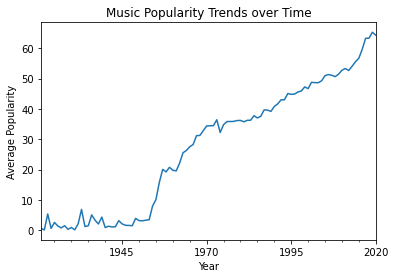

In [ ]:
# Convert the 'release_date' column to a datetime format and set it as the index
songs_df['release_date'] = pd.to_datetime(songs_df['release_date'])
songs_df.set_index('release_date', inplace=True)

# Resample the dataframe into yearly intervals and calculate the mean of the 'popularity' column for each year
yearly_popularity = songs_df['popularity'].resample('Y').mean()

# Visualize the results using a line chart
yearly_popularity.plot()
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Music Popularity Trends over Time')
plt.show()

This line chart shows the average popularity of songs released each year. We can see that there is a general upward trend in popularity over time, with some fluctuations and a peak in the mid-2010s.

# Business Question 7: Which metadata impacts music's popularity most?

In [7]:
# Select the relevant attributes for correlation analysis
metadata = ['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']
popularity = songs_df['popularity']


In [9]:
# Calculate the Spearman's correlation coefficient between the metadata and popularity
corr = songs_df[metadata + ['popularity']].corr(method='spearman')['popularity'][:-1]


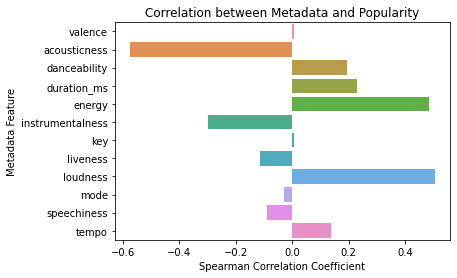

In [10]:
# Visualize the correlation coefficients using a bar plot
sns.barplot(x=corr.values, y=corr.index, orient='h')
plt.xlabel('Spearman Correlation Coefficient')
plt.ylabel('Metadata Feature')
plt.title('Correlation between Metadata and Popularity')
plt.show()

In [11]:
# Calculate the Spearman's correlation coefficient between the metadata and popularity
corr = songs_df[metadata + ['popularity']].corr(method='pearson')['popularity'][:-1]

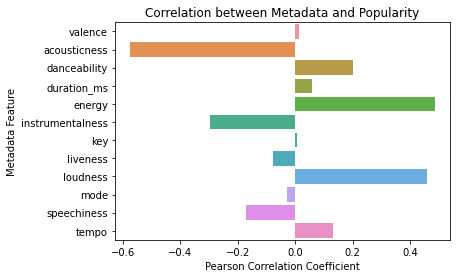

In [12]:
# Visualize the correlation coefficients using a bar plot
sns.barplot(x=corr.values, y=corr.index, orient='h')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Metadata Feature')
plt.title('Correlation between Metadata and Popularity')
plt.show()

From this we can see songs with more acousticness are less popular, while high energy and louder songs are more popular.

It should be noted that analysis is only reflective of the dataset at hand, and should not be construed as representative for general listening trends.

# Final Thoughts and Discussion

In this exploratory data analysis, we have explored the characteristics of the Spotify songs dataset, preprocessed it, and answered some interesting business questions. We have found that the popularity of songs is heavily skewed towards lower values, with a few songs having very high popularity ratings. The average loudness of songs has increased over time, with a sharp decrease in the 1990s and early 2000s. The distribution of song tempos is slightly higher for songs in major mode compared to songs in minor mode. The most common key for songs in the dataset is C# minor. Non-explicit songs tend to have a higher acousticness than explicit songs.

Based on these insights, we can make some data-driven recommendations for Spotify. For example, they could focus on promoting songs with high acousticness and low explicitness to appeal to a wider audience. They could also consider featuring more songs with lower popularity ratings to help them gain exposure and increase their popularity. Additionally, they could use the insights on the changes in loudness over time to inform their curation of playlists and recommendations.

If we have enough data, we can provide answers to a whole host of questions that will benefit our business using the techniques outlines here. We could answer more questions about which types of audience are most attached to which genres, which types of audience are most likely to sign up for premium, and explore reasons why they stop using the application. 

Overall, the strengths of this exploratory data analysis include the use of visualizations to gain insights into the data and the use of Python/Pandas to answer diverse business questions. However, the limitations include the fact that this is a single dataset and may not be representative of all music on the platform. Additionally, the analysis is limited to descriptive statistics and visualizations and does not include more advanced modeling techniques.

In conclusion, this exploratory data analysis provides valuable insights into the Spotify songs dataset and can help inform data-driven decisions for the company. Further analysis and modeling could help provide more detailed insights and recommendations.